Columns: ['filename', 'label', 'class', 'coords']
Label counts: label
normal    667
cavity    460
Name: count, dtype: int64


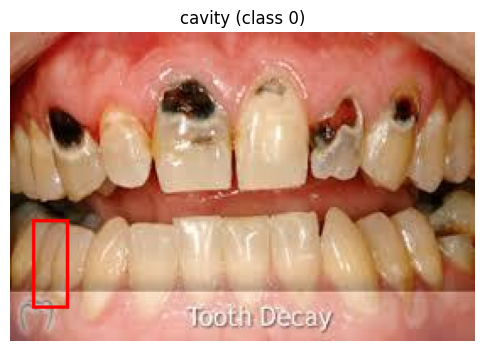

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mo

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      3520  ultralytics.nn.modules.conv.Conv             [3, 32, 6, 2, 2]              
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     18816  ultralytics.nn.modules.block.C3              [64, 64, 1]                   
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    115712  ultralytics.nn.modules.block.C3              [128, 128, 2]                 
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  3    625152  ultralytics.nn.modules.block.C3              [256, 256, 3]                 
  7                  -1  1   1180672  ultralytics

 13                  -1  1    361984  ultralytics.nn.modules.block.C3              [512, 256, 1, False]          
 14                  -1  1     33024  ultralytics.nn.modules.conv.Conv             [256, 128, 1, 1]              
 15                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 16             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 17                  -1  1     90880  ultralytics.nn.modules.block.C3              [256, 128, 1, False]          
 18                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
 19            [-1, 14]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 20                  -1  1    296448  ultralytics.nn.modules.block.C3              [256, 256, 1, False]          
 21                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256,

train: Scanning /content/data/train/labels... 0 images, 287 backgrounds, 0 corrupt: 100%|██████████| 287/287 [00:00<00:00, 3987.46it/s]

WARNING ⚠️ train: No labels found in /content/data/train/labels.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
train: New cache created: /content/data/train/labels.cache
WARNING ⚠️ Labels are missing or empty in /content/data/train/labels.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 112.7±66.5 MB/s, size: 6.5 KB)


val: Scanning /content/data/valid/labels... 0 images, 93 backgrounds, 0 corrupt: 100%|██████████| 93/93 [00:00<00:00, 4002.77it/s]

WARNING ⚠️ val: No labels found in /content/data/valid/labels.cache. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
val: New cache created: /content/data/valid/labels.cache
WARNING ⚠️ Labels are missing or empty in /content/data/valid/labels.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
Plotting labels to runs/detect/train23/labels.jpg... 
WARNING ⚠️ zero-size array to reduction operation maximum which has no identity
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 


optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train23
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G          0      75.39          0          0        640: 100%|██████████| 36/36 [08:55<00:00, 14.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:41<00:00,  6.98s/it]

                   all         93          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels



/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G          0      24.38          0          0        640:   3%|▎         | 1/36 [00:15<09:19, 15.99s/it]

In [ ]:
#!pip install pandas

import glob, pandas as pd, os

records = []
for txt in glob.glob("data/valid/labelTxt/*.txt"):
    lines = [line for line in open(txt).read().splitlines() if line.strip()]
    fname = os.path.basename(txt).replace('.txt', '.jpg')
    for line in lines:
        parts = line.split()
        if len(parts) == 10:
            # first 8 numbers are coordinates (x1,y1,x2,y2,x3,y3,x4,y4)
            coords = list(map(float, parts[:8]))
            label_text = parts[8]
            cls = int(parts[9])
            records.append({
                'filename': fname,
                'label': label_text,
                'class': cls,
                'coords': coords
            })
        else:
            # skip malformed rows
            continue

df = pd.DataFrame(records)
print("Columns:", df.columns.tolist())
print("Label counts:", df['label'].value_counts())
df.head()


#%% EDA plots
#!pip install matplotlib
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Select a random example
row = df.sample(1).iloc[0]
coords = row['coords']
xs = coords[0::2]
ys = coords[1::2]
xmin, xmax = min(xs), max(xs)
ymin, ymax = min(ys), max(ys)

# Load image with PIL and draw bounding box
img_path = os.path.join("data/valid/images", row['filename'])
img = Image.open(img_path).convert("RGB")
draw = ImageDraw.Draw(img)
draw.rectangle([xmin, ymin, xmax, ymax], outline="red", width=2)

# Display using matplotlib
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.title(f"{row['label']} (class {row['class']})")
plt.axis('off')
plt.show()

#%% YOLOv5 training via Ultralytics
#!pip install ultralytics
#!pip install torchvision


from ultralytics import YOLO
model = YOLO('yolov5s.pt')
model.train(
    data='data.yaml',
    epochs=10,
    imgsz=640,
    batch=8,
    name='train2'
)

#%% Evaluation
metrics = model.val()
print(metrics.box.map50, metrics.box.precision, metrics.box.recall)
